You have n computers. You are given the integer n and a 0-indexed integer array batteries where the ith battery can run a computer for batteries[i] minutes. You are interested in running all n computers simultaneously using the given batteries.

Initially, you can insert at most one battery into each computer. After that and at any integer time moment, you can remove a battery from a computer and insert another battery any number of times. The inserted battery can be a totally new battery or a battery from another computer. You may assume that the removing and inserting processes take no time.

Note that the batteries cannot be recharged.

Return the maximum number of minutes you can run all the n computers simultaneously.

 

Example 1:

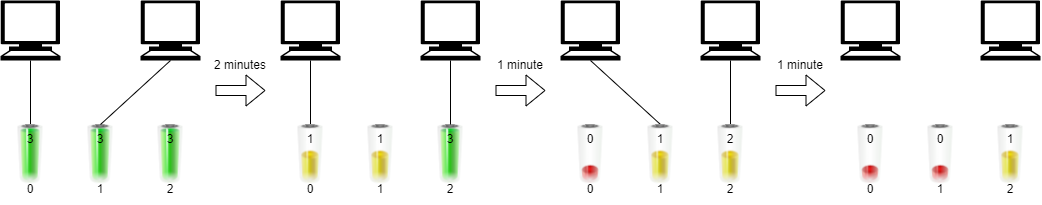

Input: n = 2, batteries = [3,3,3]
Output: 4
Explanation: 
Initially, insert battery 0 into the first computer and battery 1 into the second computer.
After two minutes, remove battery 1 from the second computer and insert battery 2 instead. Note that battery 1 can still run for one minute.
At the end of the third minute, battery 0 is drained, and you need to remove it from the first computer and insert battery 1 instead.
By the end of the fourth minute, battery 1 is also drained, and the first computer is no longer running.
We can run the two computers simultaneously for at most 4 minutes, so we return 4.

Example 2:

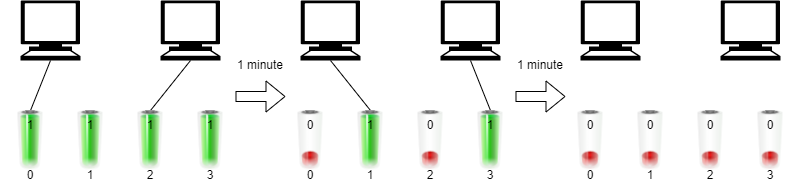

Input: n = 2, batteries = [1,1,1,1]
Output: 2
Explanation: 
Initially, insert battery 0 into the first computer and battery 2 into the second computer. 
After one minute, battery 0 and battery 2 are drained so you need to remove them and insert battery 1 into the first computer and battery 3 into the second computer. 
After another minute, battery 1 and battery 3 are also drained so the first and second computers are no longer running.
We can run the two computers simultaneously for at most 2 minutes, so we return 2.

 

Constraints:

    1 <= n <= batteries.length <= 105
    1 <= batteries[i] <= 109



In [ ]:
class Solution:
    def maxRunTime(self, n: int, batteries: List[int]) -> int:
        # Get the sum of all extra batteries.
        batteries.sort()   
        extra = sum(batteries[:-n])
        
        # live stands for the n largest batteries we chose for n computers.

        live = batteries[-n:]
        
        # We increase the total running time using 'extra' by increasing 
        # the running time of the computer with the smallest battery.
        for i in range(n - 1):
            # If the target running time is between live[i] and live[i + 1].
            if extra // (i + 1) < live[i + 1] - live[i]:
                return live[i] + extra // (i + 1)
            
            # Reduce 'extra' by the total power used.
            extra -= (i + 1) * (live[i + 1] - live[i])
        
        # If there is power left, we can increase the running time 
        # of all computers.
        return live[-1] + extra // n